# Part 2

## Preliminary

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [3]:
def activation_function(s):
    return 50 * (1 / (1 + np.exp(-s)))

## Question 1: Study the dynamics

In [4]:
omega_1 = 0.4
omega_2 = omega_1
I = -10


def f(t, y):
    return [
        -y[0] + activation_function(omega_2 * y[1] + I),
        -y[1] + activation_function(omega_1 * y[0] + I),
    ]

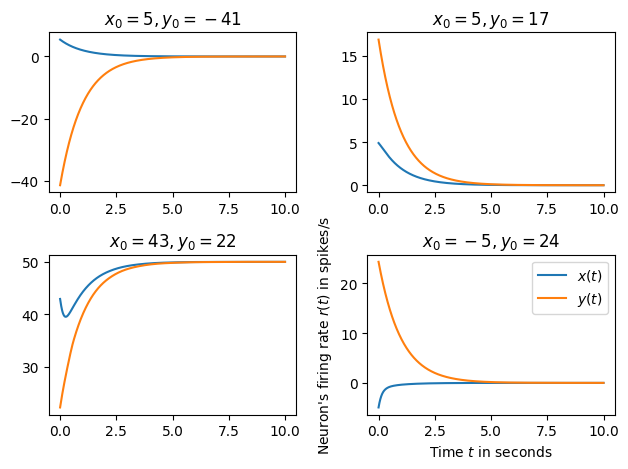

In [43]:
t0 = 0
tf = 10

random_points = []
for _ in range(4):
    rand_x = np.random.uniform(-60, 60)
    rand_y = np.random.uniform(-60, 60)
    random_points.append((rand_x, rand_y))

fig, ax = plt.subplots(nrows=2, ncols=2)

for i, (x0, y0) in enumerate(random_points):
    sol = solve_ivp(f, [t0, tf], [x0, y0], vectorized=True, dense_output=True)
    t = np.linspace(t0, tf, num=1000)
    ax[i // 2][i % 2].plot(t, sol.sol(t)[0], label="$x(t)$")
    ax[i // 2][i % 2].plot(t, sol.sol(t)[1], label="$y(t)$")
    ax[i // 2][i % 2].set_title(f"$x_0={x0:.0f}, y_0={y0:.0f}$")
plt.xlabel("Time $t$ in seconds")
plt.ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend()
plt.tight_layout()
plt.show()

## Question 2

In [22]:
random_points = []
for _ in range(10):
    rand_x = np.random.uniform(-60, 60)
    rand_y = np.random.uniform(-60, 60)
    random_points.append((rand_x, rand_y))

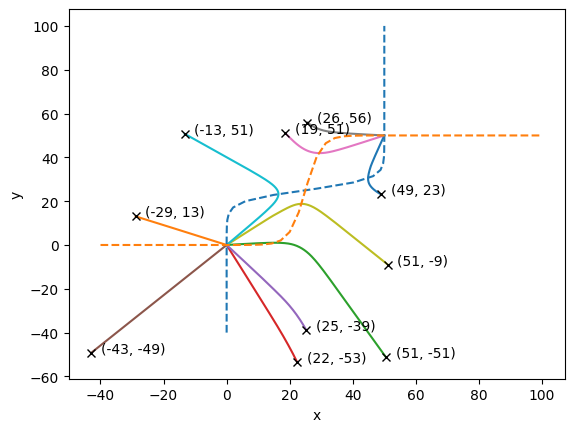

In [35]:
t0, tf = 0, 10
t = np.linspace(t0, tf, num=1000)
for x0, y0 in random_points:
    sol = solve_ivp(f, [t0, tf], [x0, y0], dense_output=True).sol(t)
    plt.plot(sol[0], sol[1])
    # TODO: Reuse same color as above plot
    plt.plot([x0], [y0], 'x', color='black')
    plt.annotate(f"({x0:.0f}, {y0:.0f})", (x0 + 3, y0))

# Plot nulclines
t = np.linspace(-40, 100)
plt.plot(activation_function(omega_2 * t + I), t, '--')
plt.plot(t, activation_function(omega_1 * t + I), '--')

plt.xlabel("x")
plt.ylabel("y")
plt.savefig("figures/part2_state_space.svg")
plt.show()

## Question 6: Bifurcation diagram